<span style="margin:auto; display:table; font-size: 16px; font-weight: bold; margin-bottom: 10px;"> TEAM ID - PTID-CDS-JAN-24-1772</span>
<span style="margin:auto; display:table; font-size: 16px; font-weight: bold;">PROJECT ID - PRCP-1015-EquakeDamagePred
</span>

<span style="font-size: 16px; font-weight: bold;">
    Business Case
</span>
<br/>
<span style="font-size: 14px;">
    We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:
    <ul style="font-size: 14px;">
        <li><b>1 - </b>represents low damage </li>
        <li><b>2 - </b>represents a medium amount of damage </li>
        <li><b>3 - </b>represents almost complete destruction </li>
    </ul>
</span>

<h4 style="font-size: 16px;"><b>Importing Libraries</b></h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the data
data_input = pd.read_csv('./data/train_values.csv')
data_output = pd.read_csv('./data/train_labels.csv')

# Merge the data based on the building id
data = pd.merge(data_input, data_output, on='building_id')

In [3]:
# Display the first 5 rows of the data
data.head(5)

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                      t               r  ...                       0   
1                      o               r  ...                       0   
2                      t               r  ...                       0   
3                      t               r  ...                       0   
4                      t               r  ...                       0   

  has_secondary_use_rental has_secondary_use_institution  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

  has_secondary_use_school has_secondary_use_industry  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   has_secondary_use_use_police  has_secondary_use_other  damage_grade  
0                             0                        0             3  
1                             0                        0             2  
2                             0                        0             3  
3                             0                        0             2  
4                             0                        0             3  

[5 rows x 40 columns]

In [4]:
# Display the last 5 rows of the data
data.tail(5)

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ... has_secondary_use_hotel  \
260596                      n               r  ...                       0   
260597                      t               r  ...                       0   
260598                      t               r  ...                       0   
260599                      t               r  ...                       0   
260600                      n               r  ...                       0   

       has_secondary_use_rental has_secondary_use_institution  \
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school has_secondary_use_industry  \
260596                        0                          0   
260597                        0                          0   
260598                        0                          0   
260599                        0                          0   
260600                        0                          0   

        has_secondary_use_health_post  has_secondary_use_gov_office  \
260596                              0                             0   
260597                              0                             0   
260598                              0                             0   
260599                              0                             0   
260600                              0                             0   

        has_secondary_use_use_police  has_secondary_use_other  damage_grade  
260596                             0                        0             2  
260597                             0                        0             3  
260598                             0                        0             3  
260599                             0                        0             2  
260600                             0                        0             3  

[5 rows x 40 columns]

<h4 style="font-size: 16px;"><b>Domain Analysis</b></h4>

<span style="font-size: 16px; font-weight: bold;">
    Features
</span>
<br />

- <span style="font-size: 14px;">
    The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.
</span>

- <span style="font-size: 14px;">
    There are 39 columns in this dataset, where the building_id column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.
</span>

| <span style="font-size: 14px;">Title</span> | <span style="font-size: 14px;">Description</span> |
| ------|------------ |
| <span style="font-size: 14px;">geo_level_1_id, geo_level_2_id, geo_level_3_id </span> | <span style="font-size: 14px;">geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567. </span> |
| <span style="font-size: 14px;">count_floors_pre_eq</span> | <span style="font-size: 14px;">number of floors in the building before the earthquake. </span> |
| <span style="font-size: 14px;">age</span> | <span style="font-size: 14px;">age of the building in years. </span> |
| <span style="font-size: 14px;">area_percentage</span> | <span style="font-size: 14px;">normalized area of the building footprint </span> |
| <span style="font-size: 14px;">height_percentage</span> | <span style="font-size: 14px;">normalized height of the building footprint </span> |
| <span style="font-size: 14px;">land_surface_condition</span> | <span style="font-size: 14px;">surface condition of the land where the building was built. Possible values: n, o, t. </span> |
| <span style="font-size: 14px;">foundation_type</span> | <span style="font-size: 14px;">type of foundation used for the building. Possible values: h, i, r, u, w. </span> |
| <span style="font-size: 14px;">roof_type</span> | <span style="font-size: 14px;">type of roof used for the building. Possible values: n, q, x. </span> |
| <span style="font-size: 14px;">ground_floor_type</span> | <span style="font-size: 14px;">type of the ground floor. Possible values: f, m, v, x, z. </span> |
| <span style="font-size: 14px;">other_floor_type</span> | <span style="font-size: 14px;">type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x. </span> |
| <span style="font-size: 14px;">position </span> | <span style="font-size: 14px;">position of the building. Possible values: j, o, s, t. </span> |


<h4 style="font-size: 16px;"><b>Basic Checks</b></h4>

In [5]:
# Total No.of Rows and Columns in dataset

rows, col = data.shape
print ("Dimensions of dataset: {}" . format (data.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (260601, 40)
Rows: 260601 
Columns: 40


In [6]:
# Columns in dataset

columns = data.columns
for i in range(len(columns)):
    print(f'Column {i}: {columns[i]}')

Column 0: building_id
Column 1: geo_level_1_id
Column 2: geo_level_2_id
Column 3: geo_level_3_id
Column 4: count_floors_pre_eq
Column 5: age
Column 6: area_percentage
Column 7: height_percentage
Column 8: land_surface_condition
Column 9: foundation_type
Column 10: roof_type
Column 11: ground_floor_type
Column 12: other_floor_type
Column 13: position
Column 14: plan_configuration
Column 15: has_superstructure_adobe_mud
Column 16: has_superstructure_mud_mortar_stone
Column 17: has_superstructure_stone_flag
Column 18: has_superstructure_cement_mortar_stone
Column 19: has_superstructure_mud_mortar_brick
Column 20: has_superstructure_cement_mortar_brick
Column 21: has_superstructure_timber
Column 22: has_superstructure_bamboo
Column 23: has_superstructure_rc_non_engineered
Column 24: has_superstructure_rc_engineered
Column 25: has_superstructure_other
Column 26: legal_ownership_status
Column 27: count_families
Column 28: has_secondary_use
Column 29: has_secondary_use_agriculture
Column 30: 

In [7]:
# Information about Columns in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

<h4 style="font-size: 16px;"><b>Insights</b></h4>

- <span style="font-size: 14px;">
    <b>Completeness of Data</b>: The dataset contains 260,601 entries, and all columns have the same number of non-null entries (260,601), indicating there are no missing values in this dataset. This is ideal for modeling as it means there's no immediate need for handling missing data.
</span>

- <span style="font-size: 14px;">
    <b>Data Types</b>: The dataset consists of both numerical (`int64`) and categorical (`object`) data types. Specifically, there are 31 numerical and 9 categorical features. Understanding the data type is crucial for preprocessing; for example, categorical variables may need to be encoded before modeling.
</span>

- <span style="font-size: 14px;">
    <b>Memory Usage</b>: The dataset consumes approximately 79.5 MB of memory. This information is useful when considering the computational resources required for processing and modeling the data, especially when working with larger datasets or limited resources.
</span>

- <span style="font-size: 14px;">
    <b>Potential for Feature Engineering</b>: Given the mix of geographical, structural, and legal ownership features, there's a significant opportunity for feature engineering. For instance, combining different geographical levels or creating new features based on the age and area percentage of buildings could potentially improve model performance.
</span>

- <span style="font-size: 14px;">
    <b>Categorical Variables Encoding</b>: The 9 categorical variables will need to be encoded before they can be used in most machine learning models. Techniques such as one-hot encoding or label encoding can be applied depending on the model requirements and the nature of the categorical data.
</span>

- <span style="font-size: 14px;">
    <b>Target Variable</b>: The `damage_grade` column is also listed among the features, which should be the target variable for prediction. It's important to separate this from the feature set when training the model.
</span>

- <span style="font-size: 14px;">
    <b>Data Scaling</b>: Numerical features have different ranges, as seen in columns like `age`, `area_percentage`, and `height_percentage`. Depending on the chosen model, scaling these features to have a similar range could be beneficial.
</span>

In [8]:
# showing datatypes
data.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [9]:
# Statistical analysis of the dataset
data.describe()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
count  2.606010e+05   260601.000000   260601.000000   260601.000000   
mean   5.256755e+05       13.900353      701.074685     6257.876148   
std    3.045450e+05        8.033617      412.710734     3646.369645   
min    4.000000e+00        0.000000        0.000000        0.000000   
25%    2.611900e+05        7.000000      350.000000     3073.000000   
50%    5.257570e+05       12.000000      702.000000     6270.000000   
75%    7.897620e+05       21.000000     1050.000000     9412.000000   
max    1.052934e+06       30.000000     1427.000000    12567.000000   

       count_floors_pre_eq            age  area_percentage  height_percentage  \
count        260601.000000  260601.000000    260601.000000      260601.000000   
mean              2.129723      26.535029         8.018051           5.434365   
std               0.727665      73.565937         4.392231           1.918418   
min               1.000000       0.000000         1.000000           2.000000   
25%               2.000000      10.000000         5.000000           4.000000   
50%               2.000000      15.000000         7.000000           5.000000   
75%               2.000000      30.000000         9.000000           6.000000   
max               9.000000     995.000000       100.000000          32.000000   

       has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  ...  \
count                 260601.000000                        260601.000000  ...   
mean                       0.088645                             0.761935  ...   
std                        0.284231                             0.425900  ...   
min                        0.000000                             0.000000  ...   
25%                        0.000000                             1.000000  ...   
50%                        0.000000                             1.000000  ...   
75%                        0.000000                             1.000000  ...   
max                        1.000000                             1.000000  ...   

       has_secondary_use_hotel  has_secondary_use_rental  \
count            260601.000000             260601.000000   
mean                  0.033626                  0.008101   
std                   0.180265                  0.089638   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   0.000000                  0.000000   
max                   1.000000                  1.000000   

       has_secondary_use_institution  has_secondary_use_school  \
count                  260601.000000             260601.000000   
mean                        0.000940                  0.000361   
std                         0.030647                  0.018989   
min                         0.000000                  0.000000   
25%                         0.000000                  0.000000   
50%                         0.000000                  0.000000   
75%                         0.000000                  0.000000   
max                         1.000000                  1.000000   

       has_secondary_use_industry  has_secondary_use_health_post  \
count               260601.000000                  260601.000000   
mean                     0.001071                       0.000188   
std                      0.032703                       0.013711   
min                      0.000000                       0.000000   
25%                      0.000000                       0.000000   
50%                      0.000000                       0.000000   
75%                      0.000000                       0.000000   
max                      1.000000                       1.000000   

       has_secondary_use_gov_office  has_secondary_use_use_police  \
count                 260601.000000                 260601.000000   
mean                 

<span style="font-size: 14px;">

1. **Range of Values**: The dataset features have a wide range of values. For example, `building_id` ranges from 4 to 1,052,934, indicating a large and diverse set of buildings. Understanding the range of values can help in identifying outliers and understanding the distribution of data.

2. **Central Tendency and Dispersion**: The mean and standard deviation for each feature provide insights into the central tendency and dispersion. For instance, `geo_level_1_id` has a mean of approximately 13.9 with a standard deviation of 8.03, suggesting a moderate spread around the central value.

3. **Damage Grade Distribution**: The `damage_grade` feature, which is the target variable, shows that the mean damage grade is approximately 2.24 with a standard deviation of 0.61. This indicates that most buildings have a medium amount of damage (`damage_grade` 2), with fewer buildings having low (1) or high (3) damage grades.

4. **Potential Outliers**: The minimum and maximum values, along with the quartiles (25%, 50%, 75%), can help identify potential outliers. For example, if the maximum value of a feature is significantly higher than its 75th percentile, it might indicate the presence of outliers.

5. **Skewness of Data**: By comparing the mean to the median (50th percentile), we can infer the skewness of the data distribution for each feature. A mean significantly higher than the median suggests a right-skewed distribution, whereas a mean lower than the median suggests a left-skewed distribution.

6. **Opportunity for Normalization**: Given the different ranges and distributions of the features, there might be a need for normalization or standardization, especially for features with a wide range of values or significant skewness, to improve model performance.

7. **Insight into Secondary Uses**: The `has_secondary_use_other` feature, with a mean close to 0 and a maximum of 1, indicates that very few buildings have a secondary use, which could be an interesting aspect to explore further in relation to damage grade
</span>

In [10]:
# unique values
data.nunique().to_frame().T

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       260601              31            1414           11595   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    9   42               84                 27   

   land_surface_condition  foundation_type  ...  has_secondary_use_hotel  \
0                       3                5  ...                        2   

   has_secondary_use_rental  has_secondary_use_institution  \
0                         2                              2   

   has_secondary_use_school  has_secondary_use_industry  \
0                         2                           2   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              2                             2   

   has_secondary_use_use_police  has_secondary_use_other  damage_grade  
0                             2                        2             3  

[1 rows x 40 columns]

In [11]:
numerical_columns = []
categorial_columns = []

for column in data.columns:
    if data[column].dtype == 'object':
        categorial_columns.append(column)
    else:
        numerical_columns.append(column)
        
print("Numerical Columns: ", numerical_columns)
print("Categorial Columns: ", categorial_columns)

Numerical Columns:  ['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other', 'damage_grade']
Categorial Columns:  ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor

<h4 style="font-size: 16px"><b>Exploratry Data Analysis</b></h4>

<h4 style="font-size: 16px"><b>Univariate Analysis</b></h4>

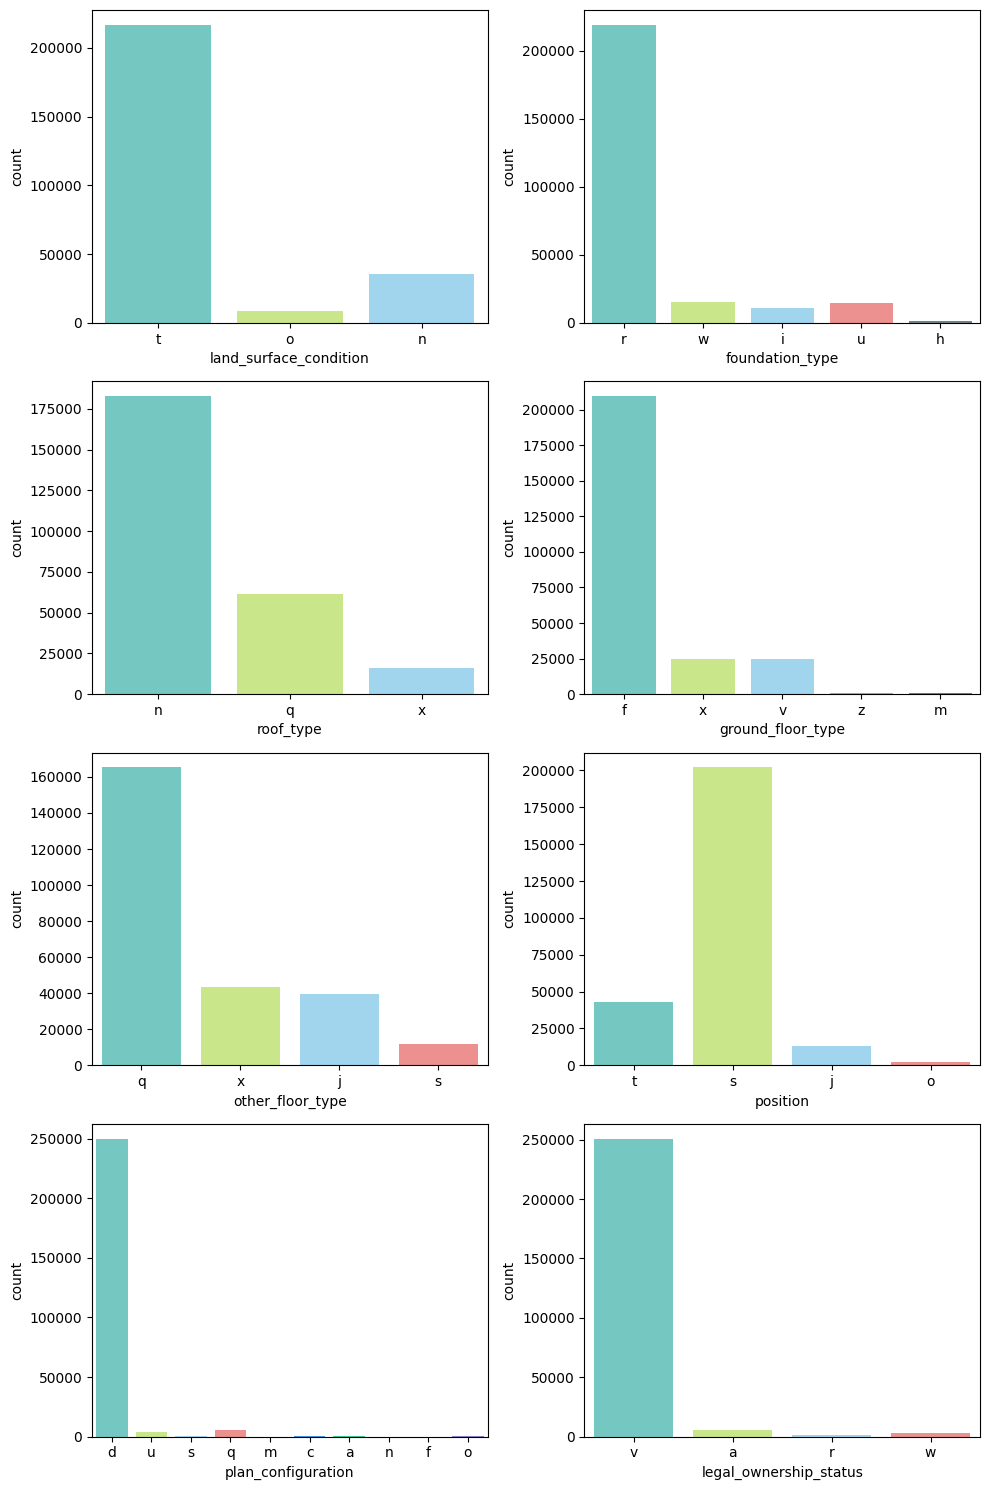

In [12]:
# CountPlot for the categorical variables in the dataset

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1
custom_colors = ["#68D4CD", "#CFF67B", "#94DAFB", "#FD8080", "#6D848E", "#26A0FC", "#26E7A6", "#FEBC3B", "#FAB1B2", "#8B75D7"]

for column in categorial_columns:
    if plotnumber <= len(categorial_columns):
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x=data[column], data=data, palette=custom_colors)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('count')
    plotnumber += 1

plt.tight_layout()

<h4 style="font-size: 16px"><b>Insights</b></h4>

- <span style="font-size: 14px;">
    <b>Land Surface Condition</b>:  The category 't' appears to be the most common land surface condition by a significant margin, followed by 'o' and 'n'. This suggests that 't' might be the typical condition of the land where most buildings are constructed.
</span>

- <span style="font-size: 14px;">
    <b>Foundation Type</b>:  The 'r' category is overwhelmingly the most common type of foundation for buildings in the dataset. The other types are much less common, with 'i' being the least represented.
</span>

- <span style="font-size: 14px;">
    <b>Roof Type</b>: The 'n' roof type is the most prevalent, with 'q' also being common. The 'x' type is the least common among the three.
</span>

- <span style="font-size: 14px;">
    <b>Ground Floor Type</b>: The 'f' type is by far the most common type of ground floor, suggesting it is the standard construction practice. The other types are significantly less common.
</span>

- <span style="font-size: 14px;">
    <b>Other Floor Type</b>: The 'q' type is the most common for floors above the ground level, with 'x', 'j', and 's' being less frequent. The 's' type is the least common.
</span>

- <span style="font-size: 14px;">
    <b>Position</b>: The 's' position is the most common, followed by 't', 'j', and 'o'. This suggests that 's' might be the most common position for buildings in the region. Whereas 'o' is the least common position for buildings in the region. 
</span>

- <span style="font-size: 14px;">
    <b>Plan Configuration</b>: The 'd' plan configuration is the most common,  by a large margin, indicating a standard building plan in the dataset. All other types are rare in comparison..
</span>

- <span style="font-size: 14px;">
    <b>Legal Ownership</b>: The 'v' legal ownership is the most common, followed by 'a', 'w', and 'r'. This suggests that 'v' might be the most common legal ownership for buildings in the region along with 'a'. The 'r' and 'w' statuses are relatively rare.
</span>



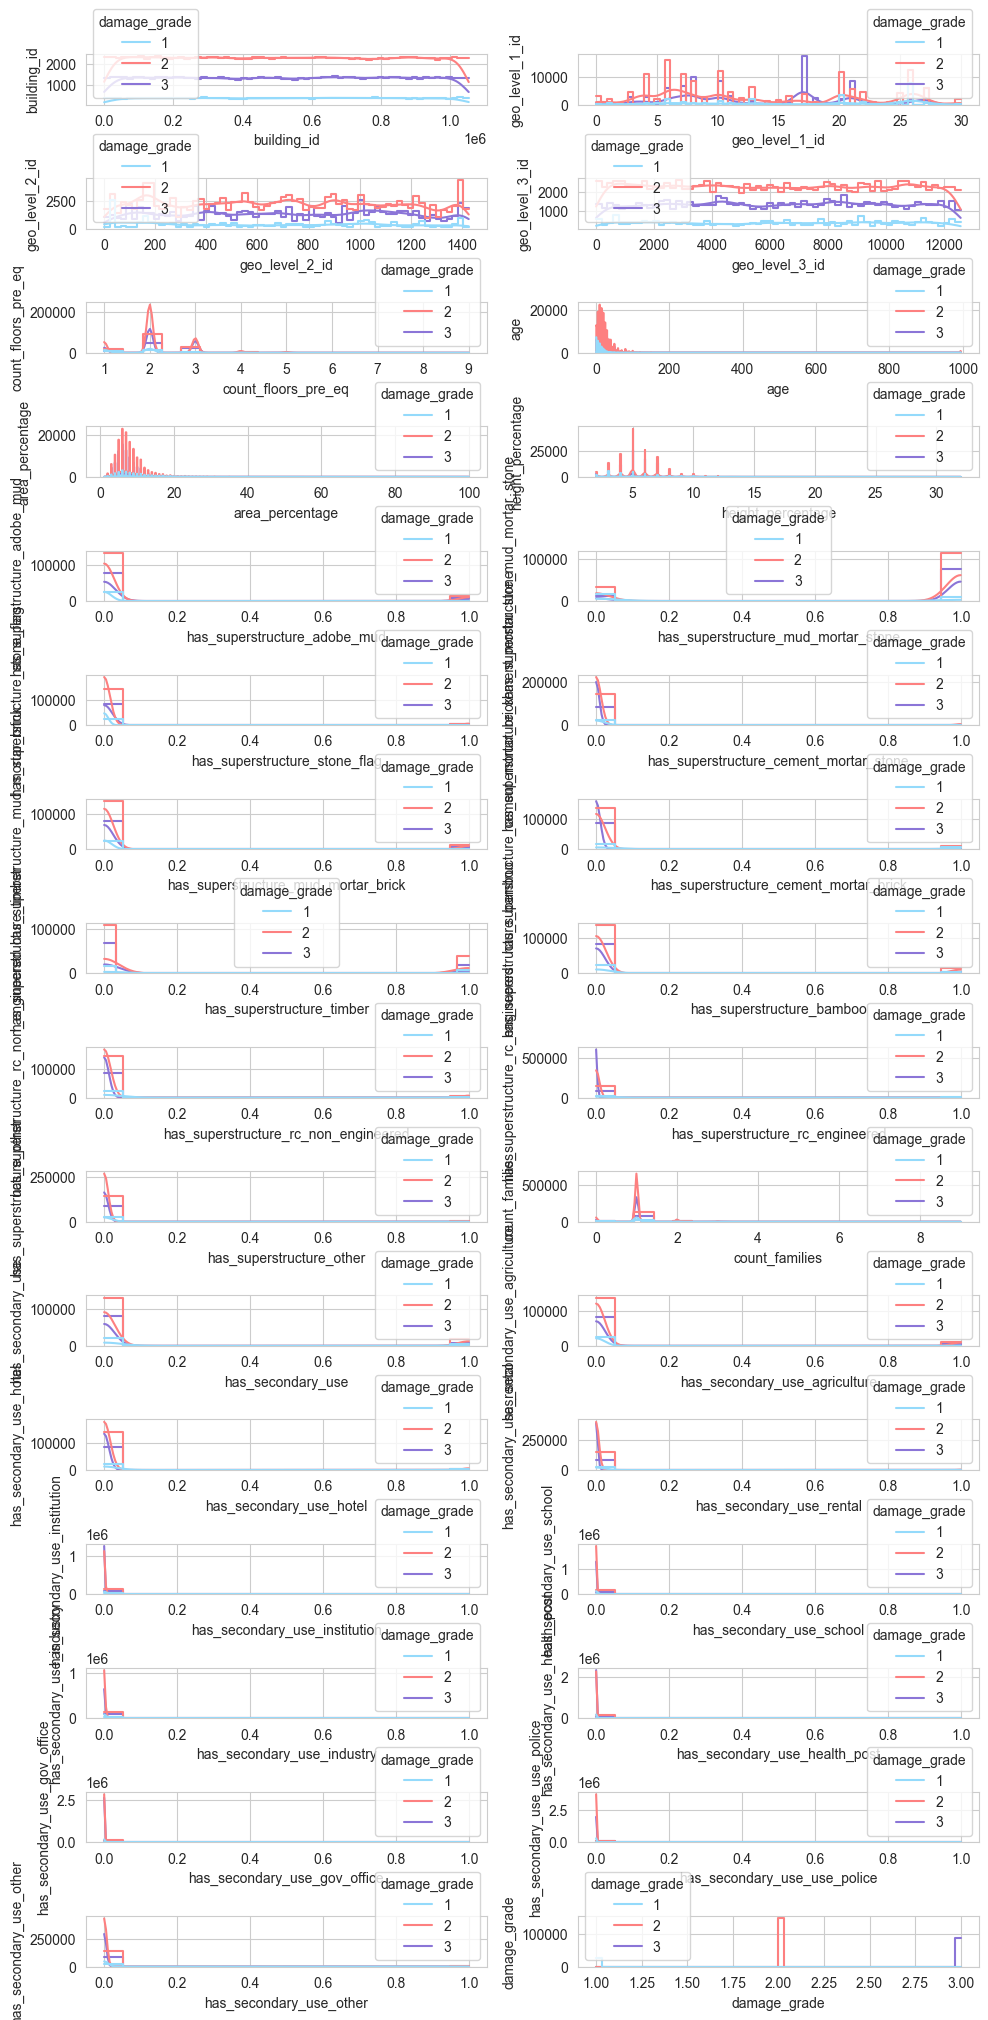

In [26]:
# histplot plot for Numerical Columns


plt.figure(figsize=(10,20),facecolor='white')
sns.set_style('whitegrid')
custom_colors = ["#94DAFB", "#FD8080", "#8B75D7", '#6D848E']

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(int((len(numerical_columns) - 1) / 2) + 1, 2, i)
    sns.histplot(data=data, x=data[column], hue=data['damage_grade'], kde=True, palette=custom_colors, fill=False, element='step')
    plt.xlabel(column, fontsize=10)
    plt.ylabel(f'{column}')

plt.tight_layout()
plt.show()

In [50]:
categorial_columns

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

<h4 style="font-size: 16px"><b>Bivariate Analysis</b></h4>

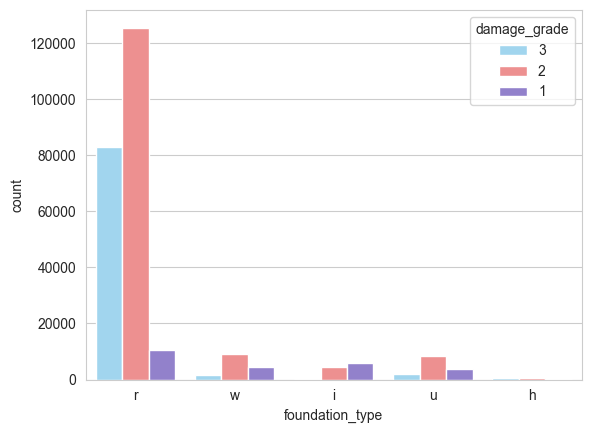

In [51]:
Df = pd.DataFrame(data)
sns.countplot(
    data=Df, 
    x=Df['foundation_type'], 
    palette=custom_colors, 
    hue=Df['damage_grade'].astype(str),
)

plt.show()

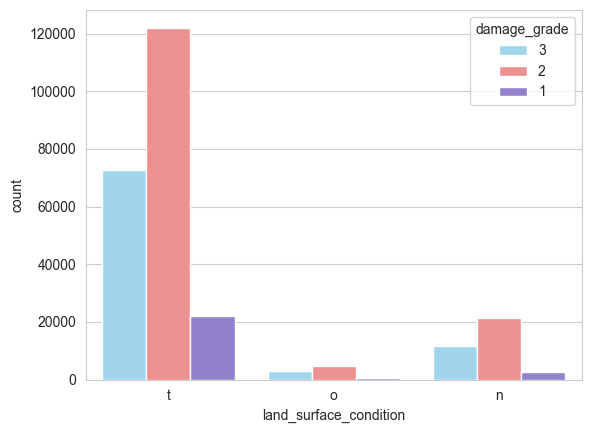

In [63]:
Df = pd.DataFrame(data)
sns.countplot(
    data=Df, 
    x=Df['land_surface_condition'], 
    palette=custom_colors, 
    hue=Df['damage_grade'].astype(str),
)

plt.show()

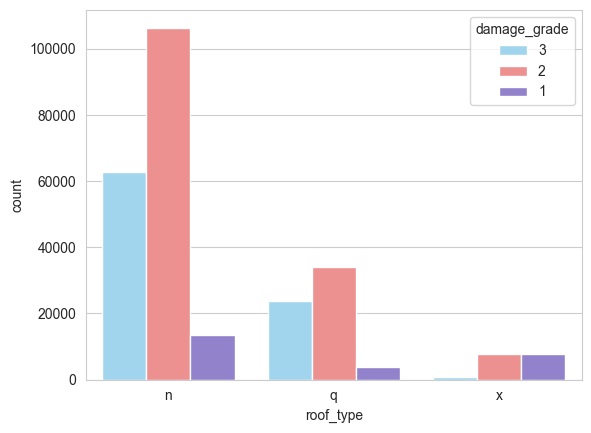

In [64]:
Df = pd.DataFrame(data)
sns.countplot(
    data=Df, 
    x=Df['roof_type'], 
    palette=custom_colors, 
    hue=Df['damage_grade'].astype(str),
)

plt.show()

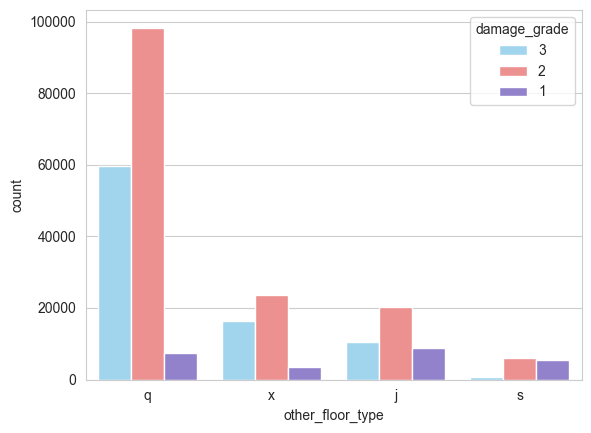

In [65]:
Df = pd.DataFrame(data)
sns.countplot(
    data=Df, 
    x=Df['other_floor_type'], 
    palette=custom_colors, 
    hue=Df['damage_grade'].astype(str),
)

plt.show()

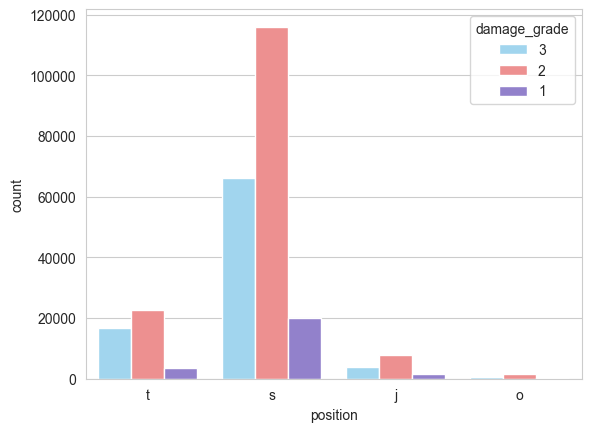

In [66]:
Df = pd.DataFrame(data)
sns.countplot(
    data=Df, 
    x=Df['position'], 
    palette=custom_colors, 
    hue=Df['damage_grade'].astype(str),
)

plt.show()

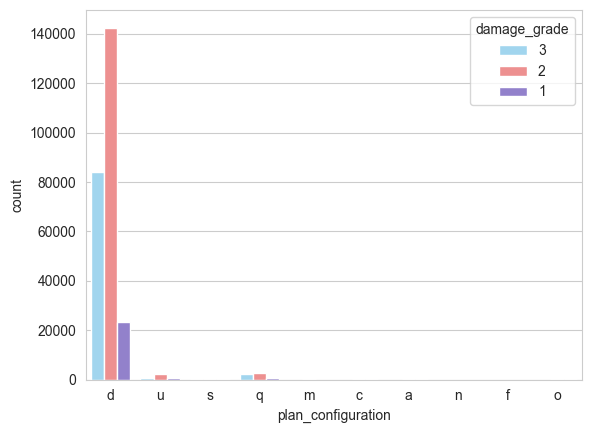

In [67]:
Df = pd.DataFrame(data)
sns.countplot(
    data=Df, 
    x=Df['plan_configuration'], 
    palette=custom_colors, 
    hue=Df['damage_grade'].astype(str),
)

plt.show()

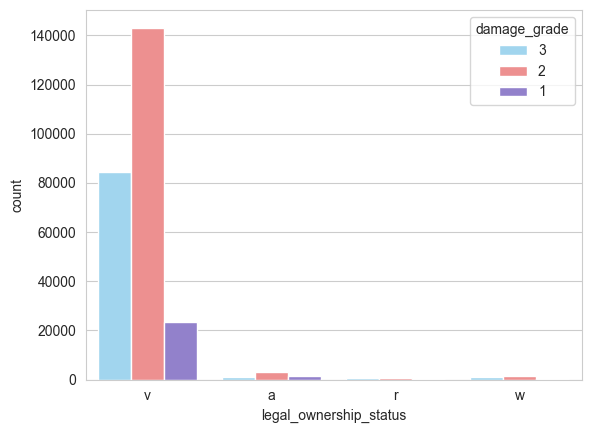

In [68]:
Df = pd.DataFrame(data)
sns.countplot(
    data=Df, 
    x=Df['legal_ownership_status'], 
    palette=custom_colors, 
    hue=Df['damage_grade'].astype(str),
)

plt.show()

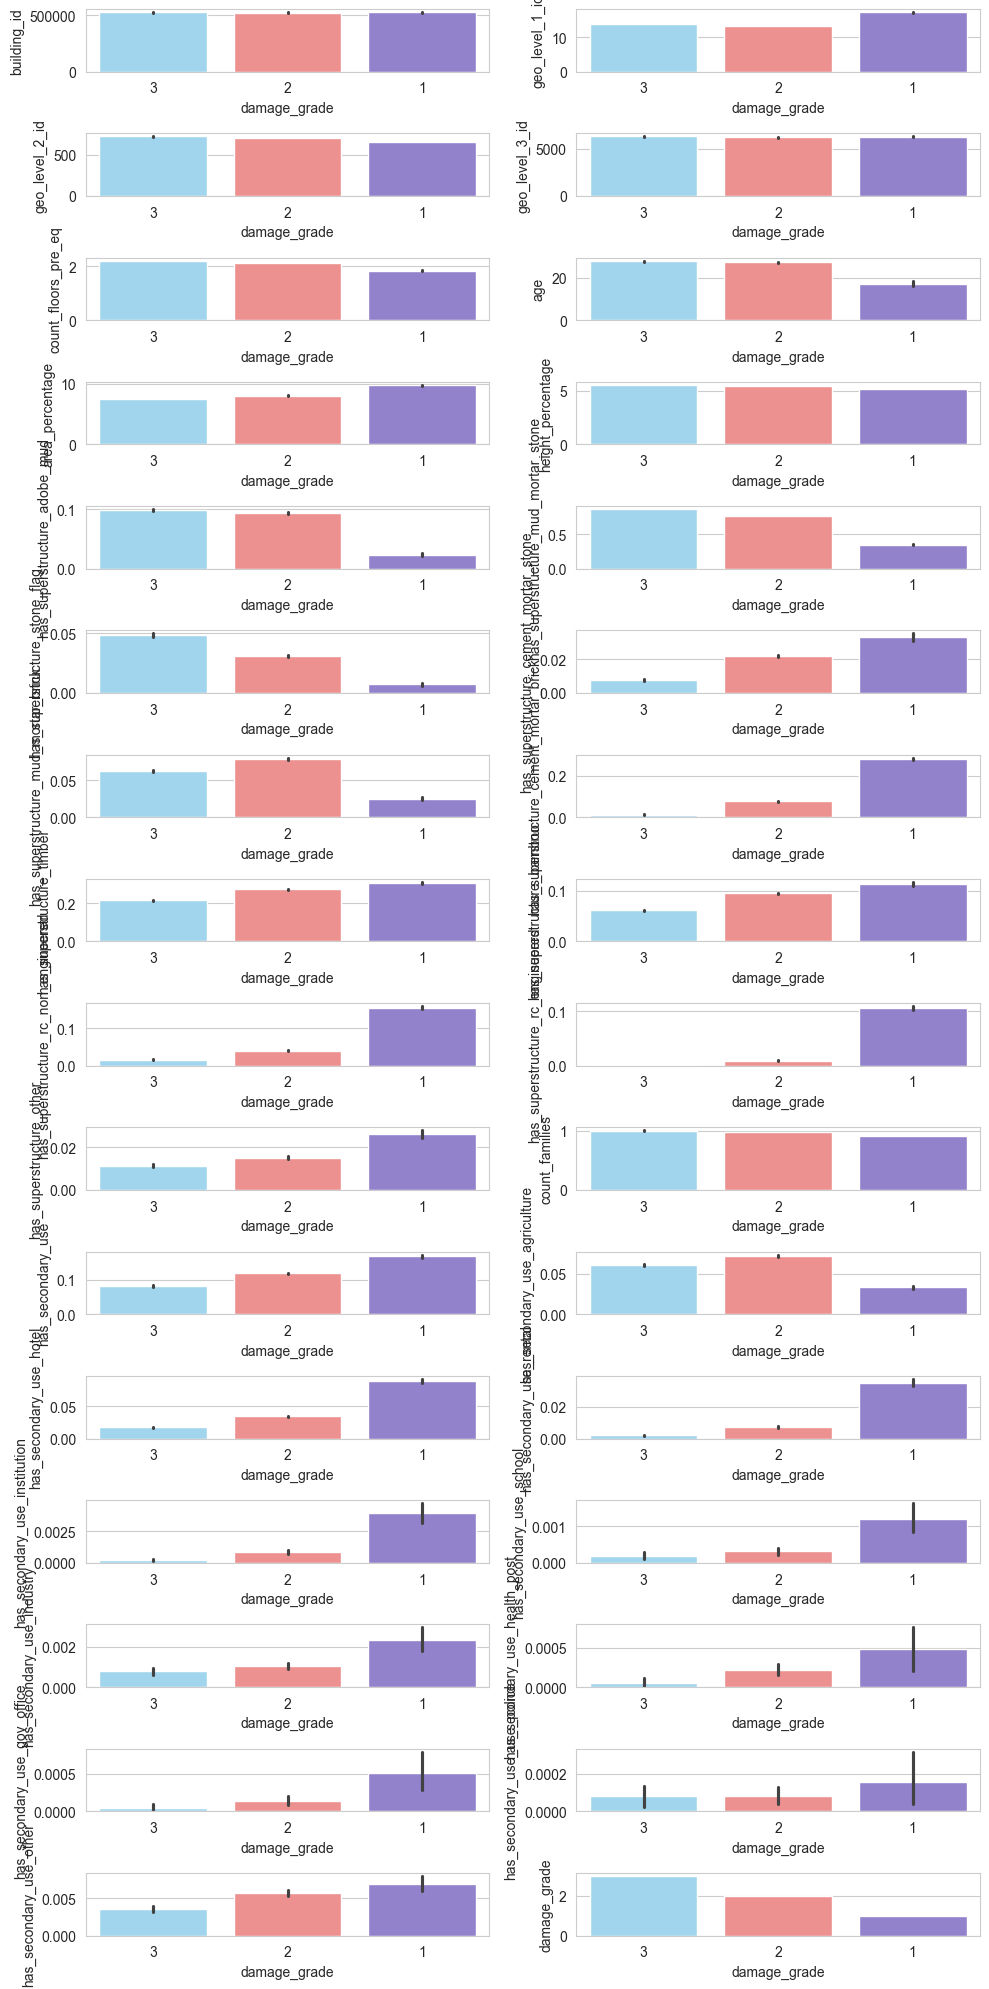

In [69]:
# Relationship between Numerical Columns and Damage Grade

plt.figure(figsize=(10,20),facecolor='white')
sns.set_style('whitegrid')
custom_colors = ["#94DAFB", "#FD8080", "#8B75D7", '#6D848E']

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(int((len(numerical_columns) - 1) / 2) + 1, 2, i)
    sns.barplot(x=data['damage_grade'].astype(str), y=data[column], data=data, palette=custom_colors)
    plt.ylabel(column, fontsize=10)
    plt.xlabel('damage_grade')

plt.tight_layout()
plt.show()

<h4 style="font-size: 16px"><b>Insights</b></h4>

- <span style="font-size: 14px;">
    <b>Height Percentage</b>: The 'height_percentage' feature, which is the target variable, shows that the mean height percentage is approximately 2.24 with a standard deviation of 0.61. This indicates that most buildings have a medium amount of damage (`damage_grade` 2), with fewer buildings having low (1) or high (3) damage grades.
</span>



<h4 style="font-size: 16px"><b>Multivariate Analysis</b></h4>

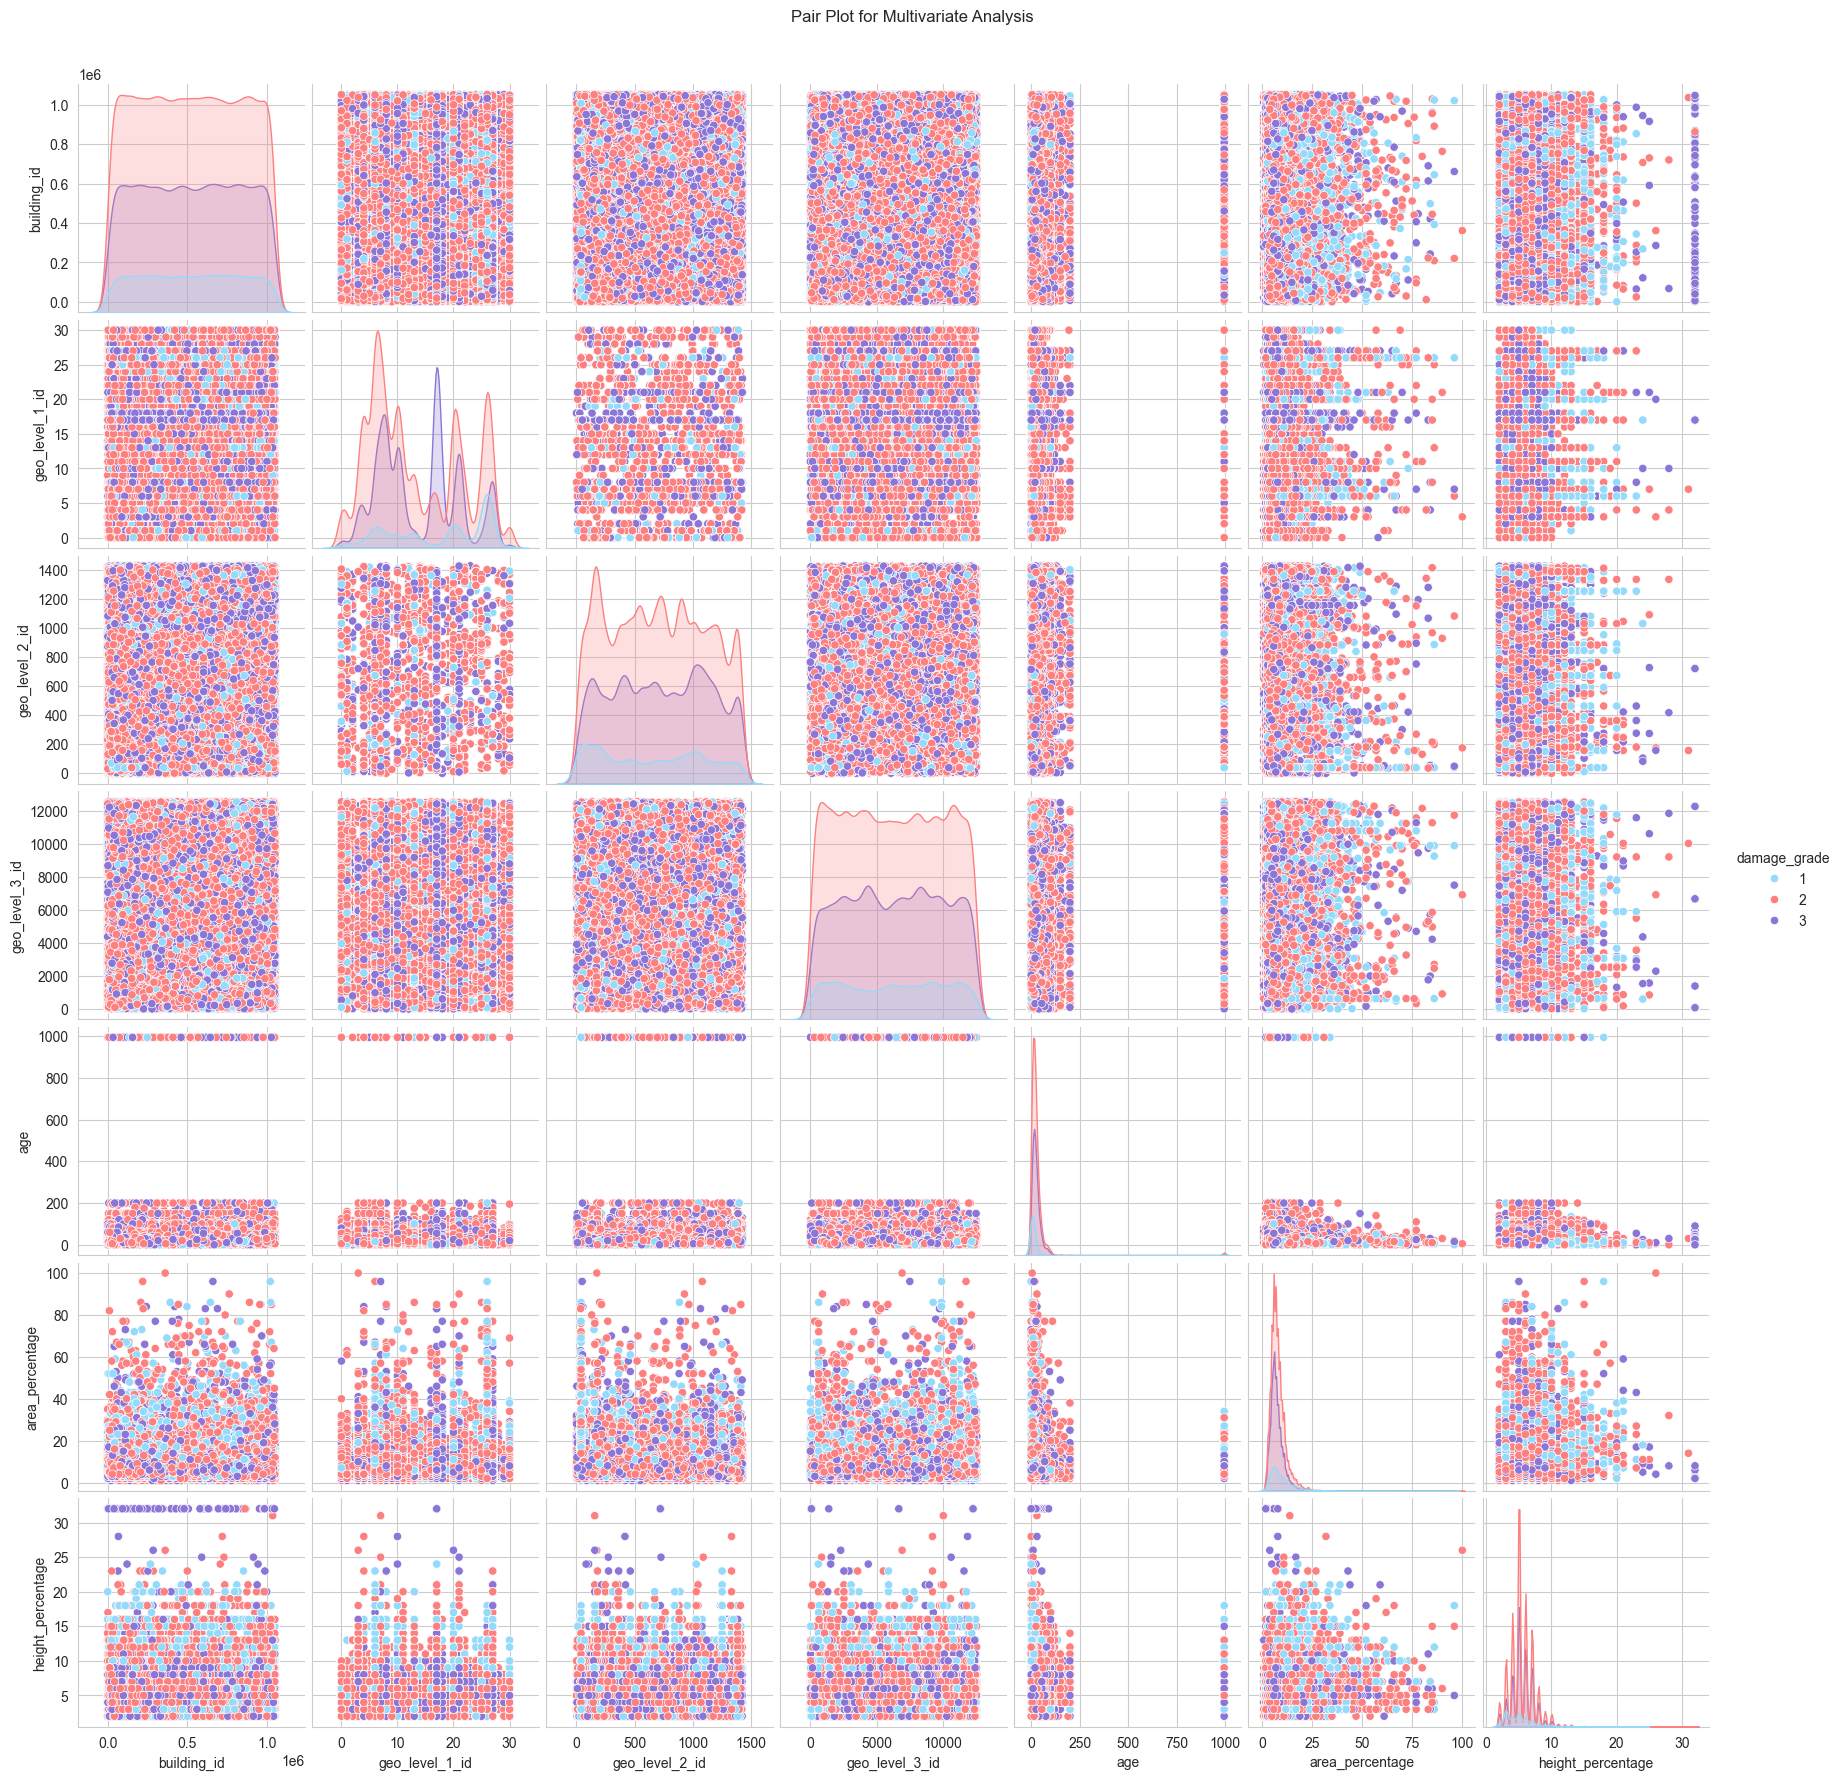

In [73]:
FEATURES = [col for col in data.columns if col != 'damage_grade']
selected_columns = [col for col in FEATURES if data[col].nunique() >= 25]
custom_colors = ["#94DAFB", "#FD8080", "#8B75D7", '#6D848E']

# Combine selected columns with the target variable 'damage_grade'
selected_columns.append('damage_grade')

# Create a DataFrame with the selected columns
selected_data = data[selected_columns]

# Use pairplot
sns.pairplot(selected_data, hue='damage_grade', palette=custom_colors)
plt.suptitle('Pair Plot for Multivariate Analysis', y=1.02)
plt.show()



<h4 style="font-size: 16px"><b>Data Preprocessing</b></h4>

<h4 style="font-size: 16px;"><b>Check for if there is any NULL Values</b></h4>

In [74]:
data.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

- <span style="font-size: 14px">Clearly implies that there is <b>NO Null values</b> in the given dataset.</span>

<h4 style="font-size: 16px;"><b>Check for dupicates in the datasets.</b></h4>

In [75]:
data.duplicated().sum()

0

- <span style="font-size: 14px">Clearly implies that there is <b>NO Duplicated values</b> in the given dataset.</span>